In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject_BA/NVL Historical Data 1_6.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,05/31/2024,"14,450","14,200","14,600","14,150",11.44M,2.12%
1,05/30/2024,"14,150","14,100","14,200","14,050",13.13M,0.00%
2,05/29/2024,"14,150","14,550","14,550","14,150",15.86M,-2.41%
3,05/28/2024,"14,500","14,500","14,600","14,350",11.43M,0.00%
4,05/27/2024,"14,500","14,600","14,600","14,300",7.87M,0.35%


In [4]:
df['Price'] = df['Price'].str.replace('$', '', regex=True)
df['Price'] = df['Price'].str.replace(',', '', regex=True)
df['Price'] = df.Price.astype(float)
df['Date'] = pd.to_datetime(df['Date'])
df=df[::-1]

In [5]:
df.set_index('Date', inplace=True)

In [6]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2018-01-02,27815.0,"27,645","27,900","27,645",837.75K,0.61%
2018-01-03,28410.0,"27,815","28,452","27,815",2.08M,2.14%
2018-01-04,28707.0,"28,410","28,750","28,028",2.66M,1.05%
2018-01-05,28962.0,"28,622","29,047","28,452",2.55M,0.89%
2018-01-08,29556.0,"28,877","29,641","28,877",2.72M,2.05%


In [7]:
#Chuẩn hóa dữ liệu
df1=df.reset_index()['Price']
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
df1

array([[0.21390472],
       [0.22115057],
       [0.2247674 ],
       ...,
       [0.04749379],
       [0.04749379],
       [0.05114716]])

In [9]:
# Prepare the dataset
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [10]:
time_step = 100
X, y = create_dataset(df1, time_step)

# Split the data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

In [11]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [12]:
# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

test_rmse = np.sqrt(np.mean((test_predict - y_test)**2))
print('Testing RMSE:', test_rmse)
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(test_predict, y_test)
test_mape = np.mean(np.abs(test_predict - y_test)/np.abs(test_predict))*100
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 505.8353503854242
Testing MAPE: 2.4393656130628627
Testing MAE: 384.94057539337666


In [13]:
# Predict future 30 days
x_input = df1[len(df1) - time_step:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = time_step
i = 0
while (i < 90):
    if (len(temp_input) > time_step):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        yhat = model.predict(x_input)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        yhat = model.predict(x_input)
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

In [14]:
# Inverse transform the future predictions
future_predict = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))

In [15]:
future_predict

array([[14626.12306369],
       [14829.58235313],
       [14772.44773749],
       [14961.93135653],
       [15080.14029862],
       [15036.90263733],
       [15158.12642464],
       [15250.64222401],
       [15374.0046301 ],
       [15511.03121242],
       [15567.03667475],
       [15808.84896823],
       [15965.40649436],
       [16091.48692859],
       [16316.15729023],
       [16462.96881973],
       [16436.30279719],
       [16664.01662691],
       [16799.81315655],
       [16965.03671566],
       [17044.10164638],
       [17253.61639328],
       [17472.52371337],
       [17685.2028599 ],
       [17787.58939766],
       [17868.53056478],
       [17949.74306619],
       [18219.79282106],
       [18330.87560088],
       [18559.06409265],
       [18602.95656191],
       [18809.72408845],
       [18948.23614305],
       [19178.15005381],
       [19386.18011031],
       [19671.05837643],
       [19883.29106273],
       [19925.16346779],
       [20205.84128937],
       [20523.44222318],


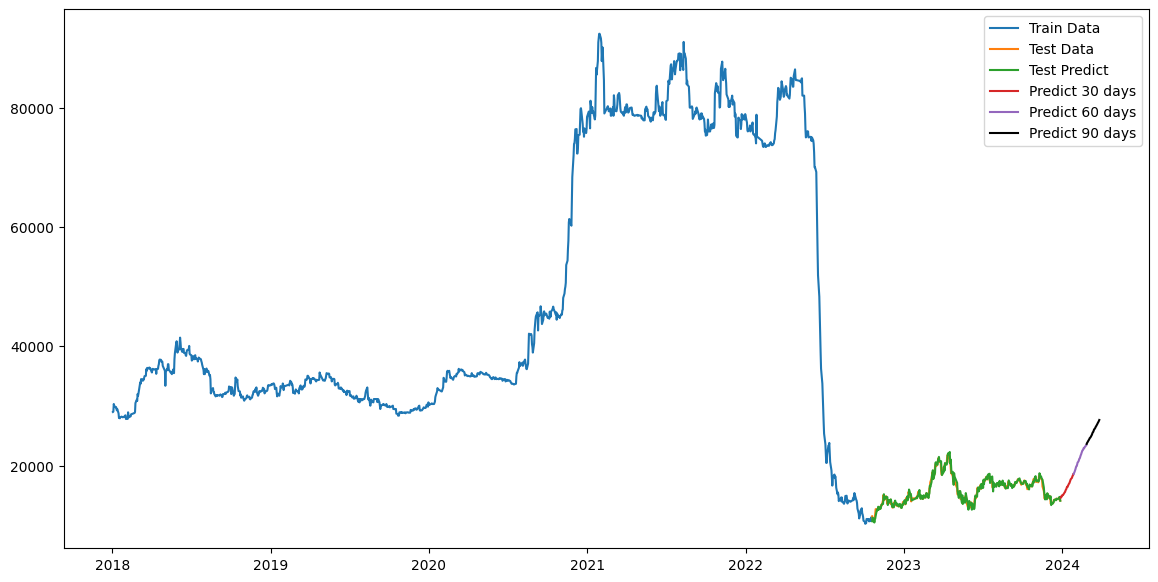

In [16]:
# Plot the results
plt.figure(figsize=(14, 7))

# Plot train data
plt.plot(df.index[:train_size], y_train, label='Train Data')

# Plot test data
plt.plot(df.index[train_size:train_size + test_size], y_test, label='Test Data')

# Plot test predict data
plt.plot(df.index[train_size:train_size + test_size], test_predict, label='Test Predict')

last_test_date = df.index[train_size + test_size - 1]
future_predict_dates = pd.date_range(start=last_test_date + pd.Timedelta(days=1), periods=30)
future_predict_dates_1 = pd.date_range(start=last_test_date + pd.Timedelta(days=31), periods=30)
future_predict_dates_2 = pd.date_range(start=last_test_date + pd.Timedelta(days=61), periods=30)

plt.plot(future_predict_dates, future_predict[0:30], label='Predict 30 days')
plt.plot(future_predict_dates_1, future_predict[30:60], label='Predict 60 days')
plt.plot(future_predict_dates_2, future_predict[60:90], label='Predict 90 days', color='black')

# Display the legend
plt.legend()

# Display the plot
plt.show()